# 광진구 빅데이터 분석

Dataframe 파일 불러온 다음 생성하기

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# region code 나타내기
region_code = pd.read_excel('./drive/MyDrive/gwangjingo/government_code.xlsx')
region_code.rename(columns={'행정동_코드' : '행정동코드', '행정동_코드_명': '행정동'}, inplace=True)

In [ ]:
region_code.head(20)

,행정동코드,행정동
0,11215840,자양3동
1,11215847,자양4동
2,11215850,구의1동
3,11215860,구의2동
4,11215870,구의3동
5,11215710,화양동
6,11215730,군자동
7,11215740,중곡1동
8,11215750,중곡2동
9,11215760,중곡3동


In [ ]:
# 서울 종합 내국인, 외국인 조회
temp_foreigner = pd.read_csv('./drive/MyDrive/gwangjingo/temp_foreigner.csv', encoding='UTF-8')
local_people = pd.read_csv('./drive/MyDrive/gwangjingo/local_people.csv', encoding='UTF-8')
local_foreigner = pd.read_csv('./drive/MyDrive/gwangjingo/local_foreigner.csv', encoding='UTF-8')

In [ ]:
temp_foreigner = temp_foreigner.merge(region_code, how='left', on = '행정동코드')
temp_foreigner = temp_foreigner[['행정동', '총생활인구수']]
temp_foreigner.rename(columns={'총생활인구수' : '장기체류외국인수'}, inplace=True)
local_foreigner = local_foreigner.merge(region_code, how='left', on = '행정동코드')
local_foreigner = local_foreigner[['행정동', '총생활인구수']]
local_foreigner.rename(columns={'총생활인구수' : '단기체류외국인수'}, inplace=True)
local_people = local_people.merge(region_code, how='left', on = '행정동코드')
local_people = local_people[['행정동', '총생활인구수']]
local_people.rename(columns={'총생활인구수' : '내국인수'}, inplace=True)

In [ ]:
temp_foreigner.head()

,행정동,장기체류외국인수
0,화양동,6402.8038
1,화양동,6442.8223
2,화양동,6458.1058
3,화양동,6378.2435
4,화양동,6462.7282


In [ ]:
local_foreigner.head()

,행정동,단기체류외국인수
0,화양동,634.2664
1,화양동,617.0072
2,화양동,628.4061
3,화양동,651.5562
4,화양동,651.3794


In [ ]:
local_people.head()

,행정동,내국인수
0,화양동,41983.3100
1,화양동,41066.6214
2,화양동,40019.2898
3,화양동,38835.6440
4,화양동,38086.5736


In [ ]:
local_people['단기체류외국인수'] = local_foreigner['단기체류외국인수']
local_people['장기체류외국인수'] = temp_foreigner['장기체류외국인수']

In [ ]:
local_people.head()

,행정동,내국인수,단기체류외국인수,장기체류외국인수
0,화양동,41983.3100,634.2664,6402.8038
1,화양동,41066.6214,617.0072,6442.8223
2,화양동,40019.2898,628.4061,6458.1058
3,화양동,38835.6440,651.5562,6378.2435
4,화양동,38086.5736,651.3794,6462.7282


In [ ]:
gwangingu = local_people
gwangingu['인구수'] = gwangingu['내국인수'] + gwangingu['단기체류외국인수'] + gwangingu['장기체류외국인수']
gwangingu = gwangingu[['행정동', '인구수']]
gwangingu = gwangingu.groupby('행정동').min()
gwangingu.head(20)

,인구수
행정동,
광장동,34442.7418
구의1동,20017.6953
구의2동,20637.4035
구의3동,28046.6240
군자동,24966.6574
능동,12155.7697
자양1동,24108.4623
자양2동,21348.3424
자양3동,24921.5369


In [ ]:

gwangingu.head(20)

,인구수
행정동,
광장동,34442.7418
구의1동,20017.6953
구의2동,20637.4035
구의3동,28046.6240
군자동,24966.6574
능동,12155.7697
자양1동,24108.4623
자양2동,21348.3424
자양3동,24921.5369


In [ ]:
final_data = pd.read_csv('./drive/MyDrive/gwangjingo/final_data.csv', encoding='cp949')

In [ ]:
final_data.head(20)


,Unnamed: 0,행정동,버스_정류장,지하철_역,집객시설,생활인구,쓰레기통
0,0,중곡1동,15,0,888,16282.27554,5
1,1,중곡2동,20,0,1248,19437.87404,9
2,2,중곡3동,21,4,1164,18040.34309,2
3,3,능동,8,4,564,17652.89104,8
4,4,구의1동,9,0,924,24602.97567,7
5,5,구의2동,20,5,1344,22214.60650,9
6,6,구의3동,24,4,1596,29830.84052,22
7,7,광장동,36,4,1668,36069.98257,16
8,8,자양1동,15,0,1272,26281.87238,7
9,9,자양2동,20,4,1140,23349.85284,3


In [ ]:
# 행정동 주소 통일시켜서 분리해서 나타낸다.
final_data['location'] = final_data['행정동'].apply(lambda x: 0 if x[0:2] == '중곡' else (1 if x[0] == '능' else (2 if x[0:2] == '구의' else (3 if x[0:2] == '광장' else (4 if x[0:2] == '자양' else (5 if x[0:2] == '화양' else 6))))))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 정규화할 열 선택
columns_to_normalize = ['버스_정류장', '지하철_역', '집객시설', '생활인구', '쓰레기통', 'location']

# 데이터 정규화
final_data_normalized = final_data.copy()
final_data_normalized[columns_to_normalize] = scaler.fit_transform(final_data_normalized[columns_to_normalize])

# 결과 확인
final_data_normalized.head(20)

,Unnamed: 0,행정동,버스_정류장,지하철_역,집객시설,생활인구,쓰레기통,location
0,0,중곡1동,0.250000,0.000,0.225000,0.000000,0.15,0.000000
1,1,중곡2동,0.428571,0.000,0.475000,0.101102,0.35,0.000000
2,2,중곡3동,0.464286,0.500,0.416667,0.056327,0.00,0.000000
3,3,능동,0.000000,0.500,0.000000,0.043913,0.30,0.166667
4,4,구의1동,0.035714,0.000,0.250000,0.266587,0.25,0.333333
5,5,구의2동,0.428571,0.625,0.541667,0.190066,0.35,0.333333
6,6,구의3동,0.571429,0.500,0.716667,0.434082,1.00,0.333333
7,7,광장동,1.000000,0.500,0.766667,0.633978,0.70,0.500000
8,8,자양1동,0.250000,0.000,0.491667,0.320377,0.25,0.666667
9,9,자양2동,0.428571,0.500,0.400000,0.226438,0.05,0.666667


In [ ]:
!pip install mclp

In [ ]:
# kmeans 이용하기
from sklearn.cluster import KMeans
import numpy as np
X = final_data[columns_to_normalize].values
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
final_data['cluster_point'] = kmeans.fit_predict(X)

# 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_

# cluster 값 종류
unique_labels = np.unique(kmeans.fit_predict(X))

In [ ]:
final_data.head(20)

,Unnamed: 0,행정동,버스_정류장,지하철_역,집객시설,생활인구,쓰레기통,location,cluster_point
0,0,중곡1동,15,0,888,16282.27554,5,0,0
1,1,중곡2동,20,0,1248,19437.87404,9,0,0
2,2,중곡3동,21,4,1164,18040.34309,2,0,0
3,3,능동,8,4,564,17652.89104,8,1,0
4,4,구의1동,9,0,924,24602.97567,7,2,0
5,5,구의2동,20,5,1344,22214.60650,9,2,0
6,6,구의3동,24,4,1596,29830.84052,22,2,0
7,7,광장동,36,4,1668,36069.98257,16,3,1
8,8,자양1동,15,0,1272,26281.87238,7,4,0
9,9,자양2동,20,4,1140,23349.85284,3,4,0


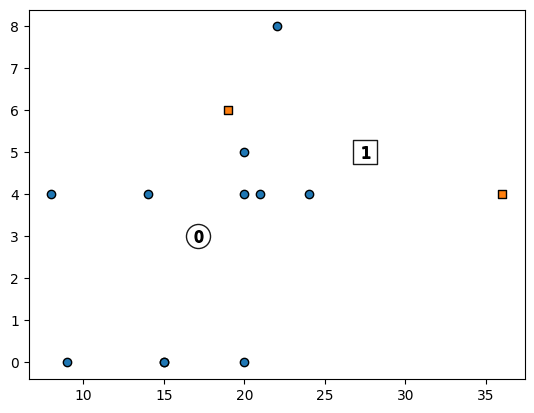

In [ ]:
# 버스, 지하철역
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['버스_정류장'], y=cluster_v['지하철_역'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()


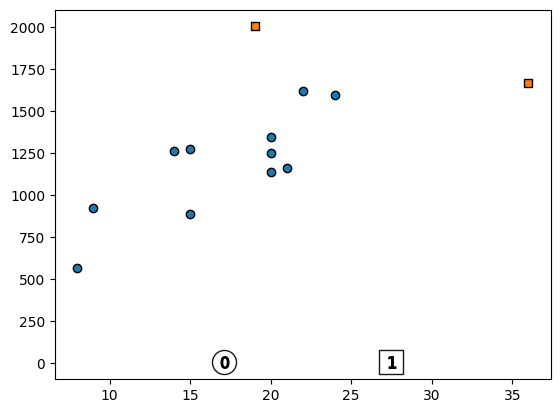

In [ ]:
# 버스, 집객시설
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['버스_정류장'], y=cluster_v['집객시설'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()


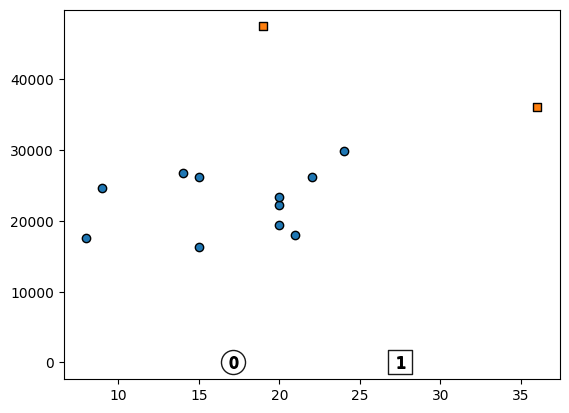

In [ ]:
# 버스, 생활인구
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['버스_정류장'], y=cluster_v['생활인구'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()


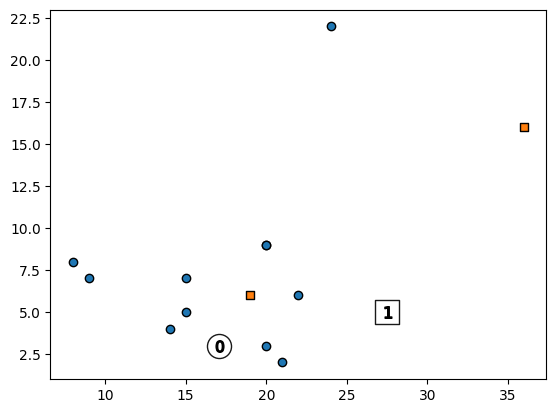

In [ ]:
# 버스, 쓰레기통
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['버스_정류장'], y=cluster_v['쓰레기통'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

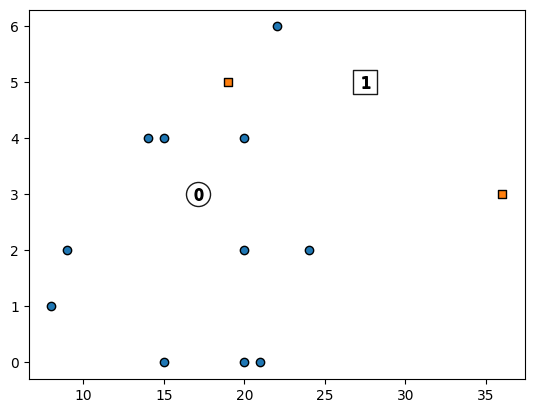

In [ ]:
# 버스, location
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['버스_정류장'], y=cluster_v['location'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

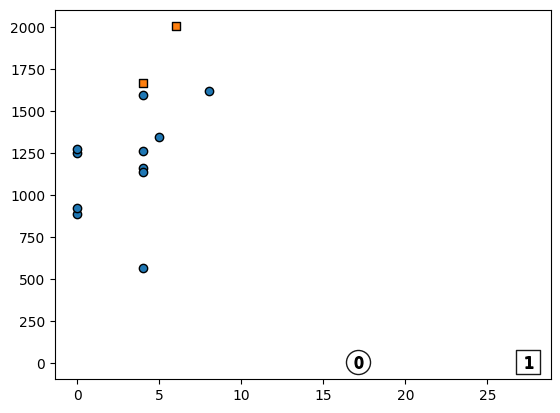

In [ ]:
# 지하철역, 생활인구
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['지하철_역'], y=cluster_v['집객시설'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

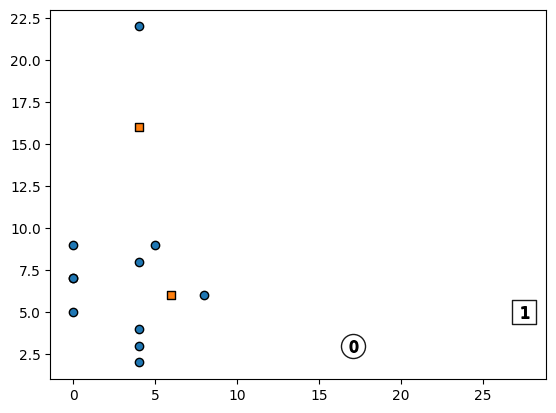

In [ ]:
# 지하철역, 쓰레기통통
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['지하철_역'], y=cluster_v['쓰레기통'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

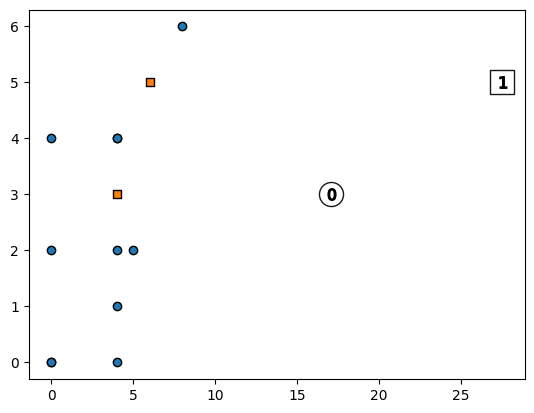

In [ ]:
# 지하철역, 쓰레기통통
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['지하철_역'], y=cluster_v['location'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

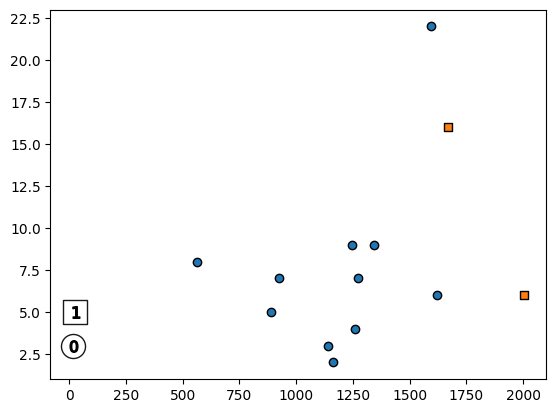

In [ ]:
# 집객시설, 생활인구
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['집객시설'], y=cluster_v['쓰레기통'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

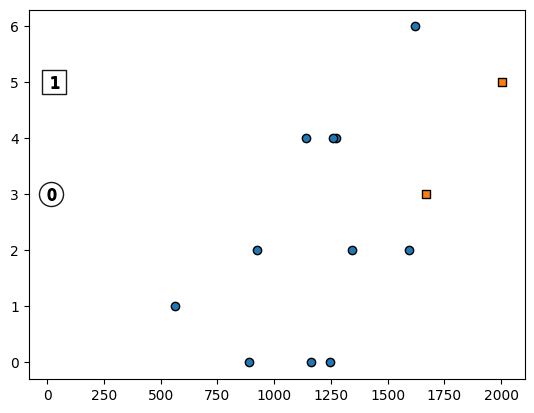

In [ ]:
# 집객시설, 생활인구
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['집객시설'], y=cluster_v['location'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

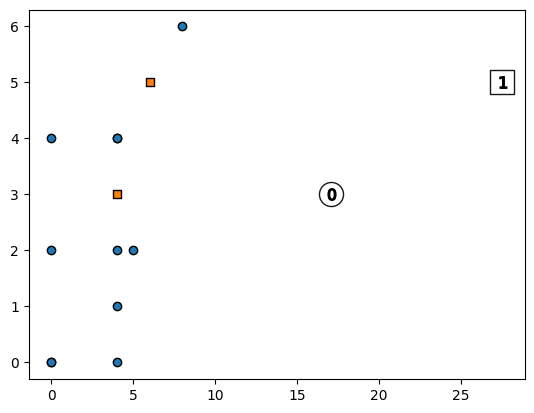

In [ ]:
# 지하철역, 쓰레기통통
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['지하철_역'], y=cluster_v['location'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

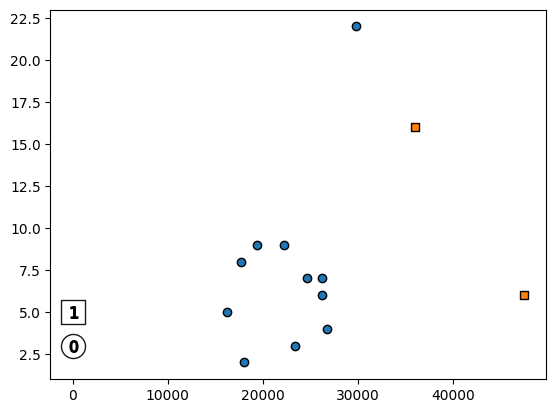

In [ ]:
# 지하철역, 쓰레기통통
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['생활인구'], y=cluster_v['쓰레기통'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

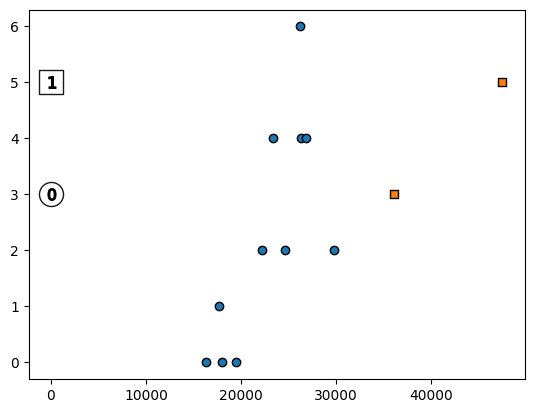

In [ ]:
# 지하철역, 쓰레기통통
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['생활인구'], y=cluster_v['location'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

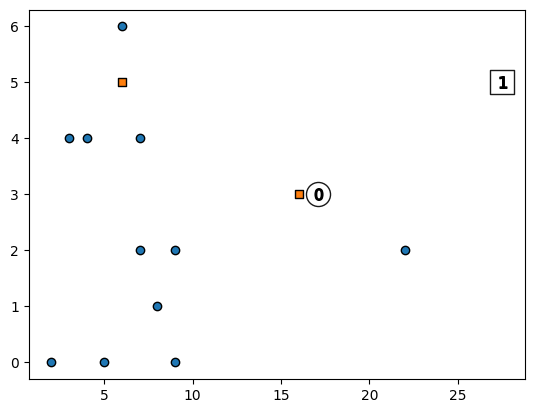

In [ ]:
# 지하철역, 쓰레기통통
import matplotlib.pyplot as plt

markers=['o', 's', '^', 'P','D','H','x']


for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = final_data[final_data['cluster_point'] == cluster]
    plt.scatter(x=cluster_v['쓰레기통'], y=cluster_v['location'], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")


plt.show()

In [ ]:
# pca 이용하기
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
# data frame 불러들어서 생성하기
"""
서울특별시 가로쓰레기통 설치정보_202312 => seoul_trash_can_install
스마트서울 도시데이터 센서(S-DoT) 유동인구 측정 정보 => smart_seoul_citydata_sensor_population
서울시버스정류소위치정보(20240404) => seoul_bus_stop_location
서울시 역사마스터 정보 => seoul_history_master_information
서울시 상권분석서비스(집객시설-행정동) => seoul_market_area_analysis
서울시 주요 공원현황 => seoul_national_park
"""
# seoul_bus_stop_location = pd.read_excel('./drive/MyDrive/gwangjingo/seoul_bus_stop_location.xlsx')
# seoul_history_master_information = pd.read_csv('./drive/MyDrive/gwangjingo/seoul_history_master_information.csv', encoding='cp949')
# seoul_market_area_analysis = pd.read_csv('./drive/MyDrive/gwangjingo/seoul_market_area_analysis.csv', encoding='cp949')
# seoul_national_park = pd.read_csv('./drive/MyDrive/gwangjingo/seoul_national_park.csv', encoding='cp949')
# seoul_trash_can_install = pd.read_excel('./drive/MyDrive/gwangjingo/seoul_trash_can_install.xlsx')
# smart_seoul_citydata_sensor_population_20240101_20240107 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240101_20240107.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240108_20240114 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240108_20240114.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240115_20240121 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240115_20240121.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240122_20240128 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240122_20240128.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240129_20240204 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240129_20240204.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240205_20240211 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240205_20240211.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240212_20240218 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240212_20240218.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240219_20240225 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240219_20240225.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240226_20240303 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240226_20240303.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240304_20240310 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240304_20240310.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240311_20240317 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240311_20240317.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240318_20240324 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240318_20240324.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population_20240301_20240406 = pd.read_csv('./drive/MyDrive/gwangjingo/smart_seoul_citydata_sensor_population_20240301_20240406.csv', encoding='cp949')
# smart_seoul_citydata_sensor_population = pd.concat([
#     smart_seoul_citydata_sensor_population_20240101_20240107, smart_seoul_citydata_sensor_population_20240108_20240114,
#     smart_seoul_citydata_sensor_population_20240115_20240121, smart_seoul_citydata_sensor_population_20240122_20240128,
#     smart_seoul_citydata_sensor_population_20240129_20240204, smart_seoul_citydata_sensor_population_20240205_20240211,
#     smart_seoul_citydata_sensor_population_20240212_20240218, smart_seoul_citydata_sensor_population_20240219_20240225,
#     smart_seoul_citydata_sensor_population_20240226_20240303, smart_seoul_citydata_sensor_population_20240304_20240310,
#     smart_seoul_citydata_sensor_population_20240311_20240317, smart_seoul_citydata_sensor_population_20240318_20240324,
#     smart_seoul_citydata_sensor_population_20240301_20240406])

In [ ]:
#행정동을 받으면 좌표를 출력
#사용하지는 않은 코드
# from geopy.geocoders import Nominatim

# def geocoding(address):
#     geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
#     geo = geolocoder.geocode(address)
#     crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

#     return crd

# crd = geocoding("대구 태전동")
# print(crd['lat'])
# print(crd['lng'])


35.9234127
128.5459483


In [ ]:
# def geocoding_reverse(lat_lng_str):
#     geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
#     address = geolocoder.reverse(lat_lng_str)

#     return address

# address = geocoding_reverse('37.560927,	127.193877')
# print(address)

오페라약국, 70, 미사강변동로, 미사1동, 하남시, 12912, 대한민국


In [ ]:
# seoul bus stop 광진구로 필터링
# seoul_bus_stop_location.rename(columns={'X좌표': '경도', 'Y좌표': '위도'}, inplace=True)
# seoul_bus_stop_location.head()

,NODE_ID,ARS_ID,정류소명,경도,위도,정류소타입
0,100000001,1001,종로2가사거리,126.987752,37.569806,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996521,37.579433,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582580,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로


In [ ]:
# new_column2 = []
# for i in seoul_bus_stop_location.index:
#   a = seoul_bus_stop_location['위도'].tolist()[i]
#   b = seoul_bus_stop_location['경도'].tolist()[i]
#   add_str = str(a)+", "+ str(b)
#   new_column2.append(str(geocoding_reverse(add_str)))
# seoul_bus_stop_location['주소'] = new_column2

KeyboardInterrupt: 

In [ ]:
# seoul_bus_stop_location 다시 살펴보기
# seoul_bus_stop_location.head(20)

In [ ]:
# smart_seoul_citydata_sensor_population dataframe 중복값 확인 + 제거 광진구로 필터링
# print(smart_seoul_citydata_sensor_population.duplicated(keep='last').value_counts())
# smart_seoul_citydata_sensor_population = smart_seoul_citydata_sensor_population.drop_duplicates()
# smart_seoul_citydata_sensor_population = smart_seoul_citydata_sensor_population[smart_seoul_citydata_sensor_population.loc[:, '자치구'] == 'Gwangjin-gu']

False    1088224
True      322972
Name: count, dtype: int64


In [ ]:
# smart_seoul_citydata_sensor_population.head(20)

,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일
7,SDOT001,4053,2023-12-31_23:50:00,residential_area,Gwangjin-gu,Gwangjang-dong,0,2024-01-01 00:08:05
14,SDOT001,4047,2023-12-31_23:56:00,traditional_markets,Gwangjin-gu,Hwayang-dong,112,2024-01-01 00:08:05
19,SDOT001,4048,2023-12-31_23:54:00,main_street,Gwangjin-gu,Guui1-dong,44,2024-01-01 00:08:05
55,SDOT001,4053,2024-01-01_00:10:00,residential_area,Gwangjin-gu,Gwangjang-dong,6,2024-01-01 00:28:01
60,SDOT001,4047,2024-01-01_00:16:00,traditional_markets,Gwangjin-gu,Hwayang-dong,57,2024-01-01 00:28:01
67,SDOT001,4048,2024-01-01_00:14:00,main_street,Gwangjin-gu,Guui1-dong,22,2024-01-01 00:28:01
114,SDOT001,4053,2024-01-01_00:20:00,residential_area,Gwangjin-gu,Gwangjang-dong,8,2024-01-01 00:38:00
123,SDOT001,4047,2024-01-01_00:26:00,traditional_markets,Gwangjin-gu,Hwayang-dong,98,2024-01-01 00:38:00
125,SDOT001,4048,2024-01-01_00:24:00,main_street,Gwangjin-gu,Guui1-dong,28,2024-01-01 00:38:00
165,SDOT001,4053,2024-01-01_00:30:00,residential_area,Gwangjin-gu,Gwangjang-dong,12,2024-01-01 00:48:01


In [ ]:
# seoul_bus_stop_location dataframe 보기
# seoul_bus_stop_location.head(20)

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입
0,100000001,1001,종로2가사거리,126.987752,37.569806,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996521,37.579433,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582580,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로
5,101000305,1006,서대문역사거리,126.966893,37.566137,중앙차로
6,100000380,1007,서울역사박물관.경희궁앞,126.970380,37.569135,중앙차로
7,100000379,1008,서울역사박물관.경희궁앞,126.970759,37.569512,중앙차로
8,100000384,1009,광화문,126.976353,37.570142,중앙차로
9,100000385,1010,광화문,126.977880,37.570240,중앙차로


In [ ]:
# seoul_history_master_information dataframe 보기
# seoul_history_master_information.head(20)

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387
5,4926,사우(김포시청),김포골드라인,37.620249,126.719731
6,4925,걸포북변,김포골드라인,37.631650,126.705975
7,4924,운양,김포골드라인,37.653867,126.683930
8,4923,장기,김포골드라인,37.643986,126.669017
9,4922,마산,김포골드라인,37.640732,126.644344


In [ ]:
# new_column = []
# for i in seoul_history_master_information.index:
#   a = seoul_history_master_information['위도'][i]
#   b = seoul_history_master_information['경도'][i]
#   add_str = str(a)+", "+str(b)
#   new_column.append(str(geocoding_reverse(add_str)))

In [ ]:
# 약 7분 소요
# seoul_history_master_information['주소'] = new_column

In [ ]:
# is_gwanggin = []
# for i in seoul_history_master_information.index:
#   adr = seoul_history_master_information['주소'][i]
#   temp = str(adr).split(', ')
#   # if "광진구" in temp:
#   #   print(temp)
#   if '광진구' in temp:
#     is_gwanggin.append(1)
#   else:
#     is_gwanggin.append(0)

In [ ]:
# seoul_market_area_analysis dataframe 보기
# seoul_market_area_analysis.head(20)
# seoul_market_area_analysis = seoul_market_area_analysis.fillna(0)

,기준_년분기_코드,행정동_코드,행정동_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,20233,11290650,정릉4동,133,7.0,3.0,0.0,0.0,12.0,2.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0
1,20233,11110515,청운효자동,93,6.0,3.0,0.0,0.0,4.0,1.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,20231,11200720,송정동,44,2.0,0.0,0.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
3,20231,11260550,면목5동,42,2.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
4,20233,11110530,사직동,206,18.0,24.0,0.0,0.0,15.0,0.0,...,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,20232,11440585,도화동,144,4.0,7.0,0.0,0.0,15.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,38.0
5096,20232,11470520,목2동,97,3.0,2.0,0.0,1.0,13.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,18.0
5097,20232,11320660,쌍문1동,126,6.0,1.0,0.0,1.0,4.0,1.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
5098,20232,11320670,쌍문2동,87,3.0,1.0,0.0,1.0,10.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,19.0


In [ ]:
# seoul_national_park dataframe 생성
# seoul_national_park.head(20)

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,18,어린이대공원,어린이대공원은 어린이들을 위한 공원 건립을 목표로 1972. 6. 20일 부지를 확...,560552㎡,1973.5.5,교양시설：41개소(야외음악당 등) 조경시설：14개소(분수대 등) 유희시설：45종(놀...,수목：143종 408천주,http://parks.seoul.go.kr/template/common/img/p...,지하철 정문 2호선 건대입구 역 버스이용 5분거리 또는 환승 : 7호선 7호선 어린...,일반사항 차량 오토바이 자전거 퀵보드 인라인 스케이트 등은 출입을 금지합니다. (사...,http://parks.seoul.go.kr/file/info/view.do?fId...,광진구,서울특별시 광진구 능동로 216(어린이대공원),시설관리공단 어린이대공원,02-450-9311,207108.8650,449977.6200,127.080921,37.549899,http://www.sisul.or.kr/open_content/childrenpark/
1,114,아차산생태공원,서울특별시에서 공원녹지 확충 5개년 계획에 따라 조성된 아차산 생태공원은 시민과 학...,23450㎡,2002.3,남의광장 생태자료실 자생식물원 나비공원 습지원 황톳길 지압보도 및 약수터,NaN,http://parks.seoul.go.kr/upload/seditorMulti/2...,제1등산로(광개토대왕길) : 아차산역(지하철5호선) ~ 3번 마을버스 ~ 도보 제2...,NaN,http://parks.seoul.go.kr/file/info/view.do?fId...,광진구,서울특별시 광진구 광장동 370,광진구청 공원녹지과,02-450-1192,208869.3493,450460.3592,127.101003,37.551714,NaN


In [ ]:
# seoul_trash_can_install dataframe 생성
# seoul_trash_can_install_column = seoul_trash_can_install.loc[3]
# seoul_trash_can_install = seoul_trash_can_install.loc[4:]
# seoul_trash_can_install = seoul_trash_can_install.set_axis(seoul_trash_can_install_column, axis='columns')
# seoul_trash_can_install = seoul_trash_can_install.set_index('연번')
# seoul_trash_can_install.head(20)

3,자치구명,설치위치(도로명 주소),세부 위치,설치 장소 유형,수거 쓰레기 종류
연번,,,,,
1,종로구,사직로 125,경복궁역 4번출구,지하철역 입구,일반쓰레기
2,종로구,사직로 125,경복궁역 4번출구,지하철역 입구,재활용쓰레기
3,종로구,자하문로 28,스타벅스 앞,도로변(횡단보도 포함),일반쓰레기
4,종로구,자하문로 28,스타벅스 앞,도로변(횡단보도 포함),재활용쓰레기
5,종로구,자하문로 44,라파리나 카페 앞,도로변(횡단보도 포함),일반쓰레기
6,종로구,자하문로 44,라파리나 카페 앞,도로변(횡단보도 포함),재활용쓰레기
7,종로구,자하문로 68,평화제과 앞,도로변(횡단보도 포함),일반쓰레기
8,종로구,자하문로 68,평화제과 앞,도로변(횡단보도 포함),재활용쓰레기
9,종로구,자하문로 13-2,경복궁역 2번출구방면 뉴욕버거 앞,도로변(횡단보도 포함),일반쓰레기


In [ ]:
# 정규화된 데이터셋 불러오기